The goal of this project is to develop a robust email spam detection system using machine
learning techniques,

By analyzing the content and characteristics of emails, the system should
be able to accurately classify incoming emails as either spam or legitimate (ham).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import nltk
from nltk.corpus import stopwords
from collections import Counter



In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Data collection and pre-processing

In [ ]:
raw_mail_data=pd.read_csv('/spam.csv')
raw_mail_data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
# replacing the null value with a null string
mail_data= raw_mail_data.where((pd.notnull(raw_mail_data)),'')

In [ ]:
mail_data.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
mail_data.shape

(5572, 2)

In [ ]:
mail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
mail_data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


### level encoding

In [ ]:
# level spam mails as 0 and ham mails as 1
mail_data.loc[mail_data['Category']=='spam','Category']=0
mail_data.loc[mail_data['Category']=='ham','Category']=1

In [ ]:
# seperating the datya as texts and label
x= mail_data['Message']
y= mail_data['Category']

In [ ]:
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [ ]:
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object

In [ ]:
# slpitting the data into training and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=3)

In [ ]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)


(5572,)
(4457,)
(1115,)


In [ ]:
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(5572,)
(4457,)
(1115,)


### Feature Extraction


In [ ]:
# Create a TF-IDF vectorizer to convert text messages into numerical features

feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

In [ ]:
# Convert the training and testing text messages into numerical features using TF-IDF

x_train_features = feature_extraction.fit_transform(x_train)
x_test_features = feature_extraction.transform(x_test)


In [ ]:
# Convert the target values to integers (0 and 1)

y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [ ]:
print(x_train)

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object


In [ ]:
print(x_train_features)

  (0, 5413)	0.6198254967574347
  (0, 4456)	0.4168658090846482
  (0, 2224)	0.413103377943378
  (0, 3811)	0.34780165336891333
  (0, 2329)	0.38783870336935383
  (1, 4080)	0.18880584110891163
  (1, 3185)	0.29694482957694585
  (1, 3325)	0.31610586766078863
  (1, 2957)	0.3398297002864083
  (1, 2746)	0.3398297002864083
  (1, 918)	0.22871581159877646
  (1, 1839)	0.2784903590561455
  (1, 2758)	0.3226407885943799
  (1, 2956)	0.33036995955537024
  (1, 1991)	0.33036995955537024
  (1, 3046)	0.2503712792613518
  (1, 3811)	0.17419952275504033
  (2, 407)	0.509272536051008
  (2, 3156)	0.4107239318312698
  (2, 2404)	0.45287711070606745
  (2, 6601)	0.6056811524587518
  (3, 2870)	0.5864269879324768
  (3, 7414)	0.8100020912469564
  (4, 50)	0.23633754072626942
  (4, 5497)	0.15743785051118356
  :	:
  (4454, 4602)	0.2669765732445391
  (4454, 3142)	0.32014451677763156
  (4455, 2247)	0.37052851863170466
  (4455, 2469)	0.35441545511837946
  (4455, 5646)	0.33545678464631296
  (4455, 6810)	0.29731757715898277
  (4

##Training model
### Logistic regression


In [ ]:
# Create a logistic regression model and train it on the training data

model = LogisticRegression()
model.fit(x_train_features, y_train)

LogisticRegression()

### Evaluating the trained model

In [ ]:
# prediction on training data
prediction_on_training_data=model.predict(x_train_features)
accuracy_on_training_data= accuracy_score(y_train, prediction_on_training_data)

In [ ]:
print('Accuracy on training data:', accuracy_on_training_data)

Accuracy on training data: 0.9670181736594121


In [ ]:
# prediction on test data
prediction_on_test_data=model.predict(x_test_features)
accuracy_on_test_data= accuracy_score(y_test, prediction_on_test_data)

In [ ]:
print('Accuracy on test data:', accuracy_on_test_data)

Accuracy on test data: 0.9659192825112107


Building a predictive system

In [ ]:
# Test the model with some custom email messages
input_mail=["URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction
prediction= model.predict(input_data_features)
print(prediction)

[0]


spam=0

ham=1

In [ ]:
if (prediction[0]==1):
  print('Ham mail')

else:
  print('spam mail')

spam mail


In [ ]:
# Test the model with some custom email messages
input_mail=["I HAVE A DATE ON SUNDAY WITH WILL!!"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction
prediction= model.predict(input_data_features)
print(prediction)

if (prediction[0]==1):
  print('Ham mail')
else:
  print('spam mail')

[1]
Ham mail


### Data visualization

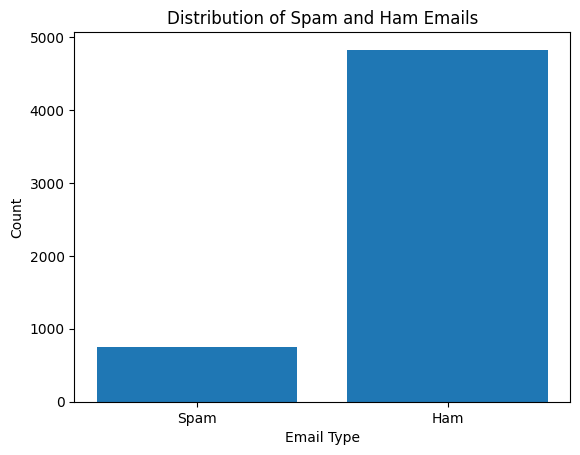

In [ ]:
# Distribution of Spam and Ham Emails

spam_count = mail_data[mail_data['Category'] == 0].shape[0]
ham_count = mail_data[mail_data['Category'] == 1].shape[0]

plt.bar(['Spam', 'Ham'], [spam_count, ham_count])
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Distribution of Spam and Ham Emails')
plt.show()

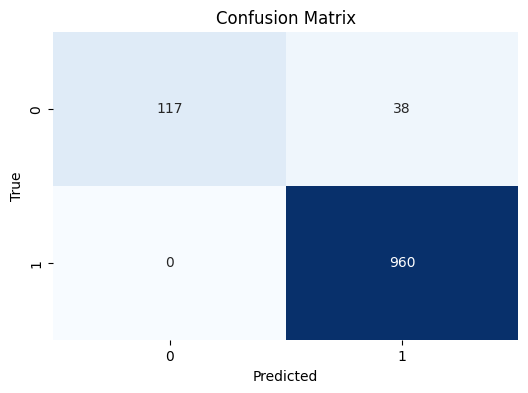

In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test, prediction_on_test_data)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


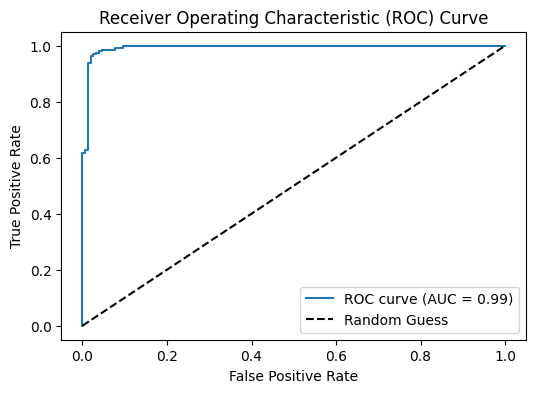

In [ ]:
# ROC Curve

probabilities = model.predict_proba(x_test_features)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
roc_auc = roc_auc_score(y_test, probabilities)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

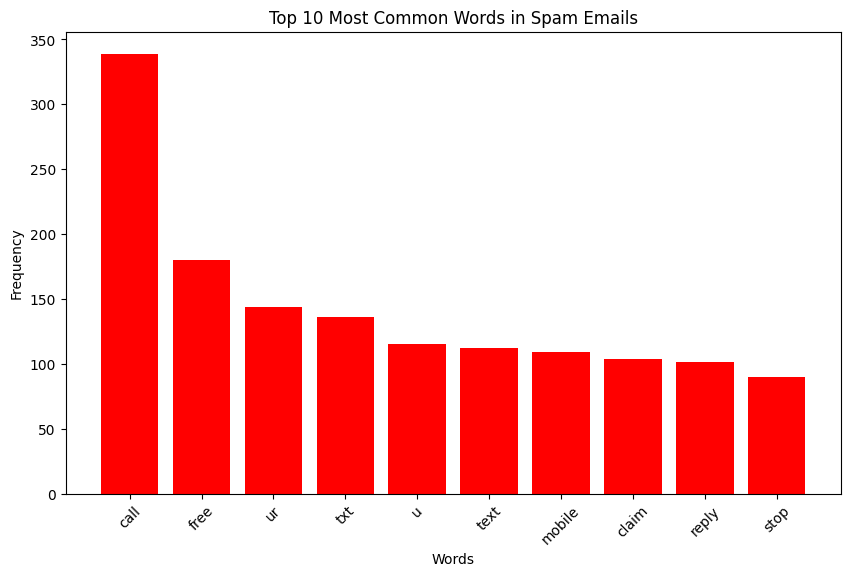

In [ ]:
#Top 10 Most Common Words in Spam Emails

stop_words = set(stopwords.words('english'))
spam_words = " ".join(mail_data[mail_data['Category'] == 0]['Message']).split()
ham_words = " ".join(mail_data[mail_data['Category'] == 1]['Message']).split()

spam_word_freq = Counter([word.lower() for word in spam_words if word.lower() not in stop_words and word.isalpha()])

plt.figure(figsize=(10, 6))
plt.bar(*zip(*spam_word_freq.most_common(10)), color='r')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in Spam Emails')
plt.xticks(rotation=45)
plt.show()

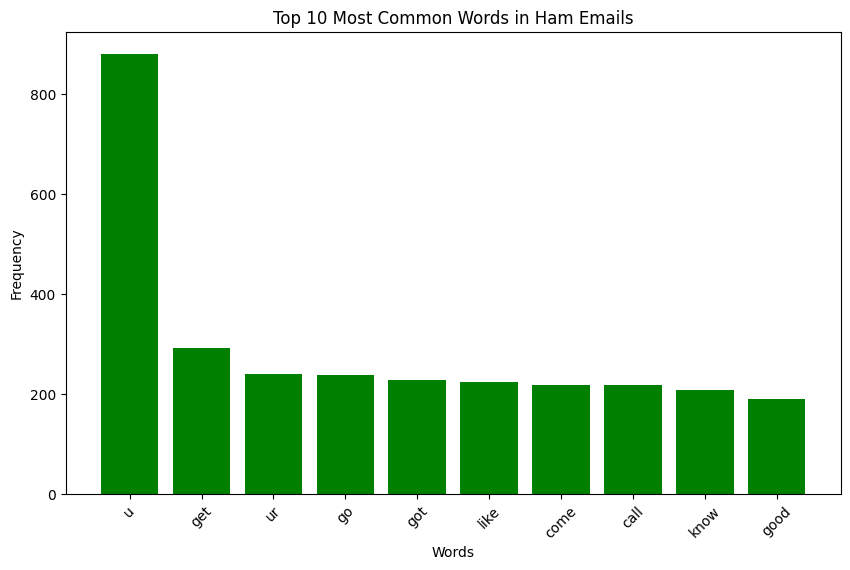

In [ ]:
# Top 10 Most Common Words in Ham Emails

ham_word_freq = Counter([word.lower() for word in ham_words if word.lower() not in stop_words and word.isalpha()])

plt.figure(figsize=(10, 6))
plt.bar(*zip(*ham_word_freq.most_common(10)), color='g')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in Ham Emails')
plt.xticks(rotation=45)
plt.show()